In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
# Reading our data file
heart_data = pd.read_csv("heart.csv")
# try to see the columns of our data to check everything is fine
heart_data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
# our prediction target is 'target' 
y = heart_data.target

# our features are all columns but the target
heart_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = heart_data[heart_features]

# let's see our data or some of it
X.describe()
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
# we will use Scikit-learn, which is easily the most popular library for modeling the types of data typically stored in DataFrames.
from sklearn.model_selection import train_test_split

# first , we will split our data into: training and validation data.
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 1 , test_size = 0.30)


In [9]:
# after splitting our data , now let us use the training data to build our model  
from sklearn.tree import DecisionTreeClassifier

# Define the model
heart_model = DecisionTreeClassifier()

# Fit the model which where the model Capture patterns from provided data (creating the decision tree model).
heart_model = heart_model.fit(train_X, train_y)

# the result of our model prediction after trainig it
# print(heart_model.predict(train_X))
print(heart_model.predict(test_X))


[0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1
 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1]


In [20]:
pip install matplotlib



     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     ---- -------------------------------- 20.5/162.8 kB 640.0 kB/s eta 0:00:01
     ------ ------------------------------ 30.7/162.8 kB 435.7 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/162.8 kB 655.4 kB/s eta 0:00:01
     --------------------------------- -- 153.6/162.8 kB 833.5 kB/s eta 0:00:01
     ------------------------------------ 162.8/162.8 kB 747.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
    --------------------------------------- 0.1/7.7 MB ? eta -:--:--
   - -------------------------------------- 0.2/7.7 MB 2.2 MB/s eta 0:00:04
   - -------------------------------------- 0.2/7.7 MB 2.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/7.7 MB 2.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/7.7 MB 2.3 MB/s eta 0:00:04
   ----- ---------------------------------- 1.1/7.7 MB 3.8 MB/s eta 0:00:02
   -----

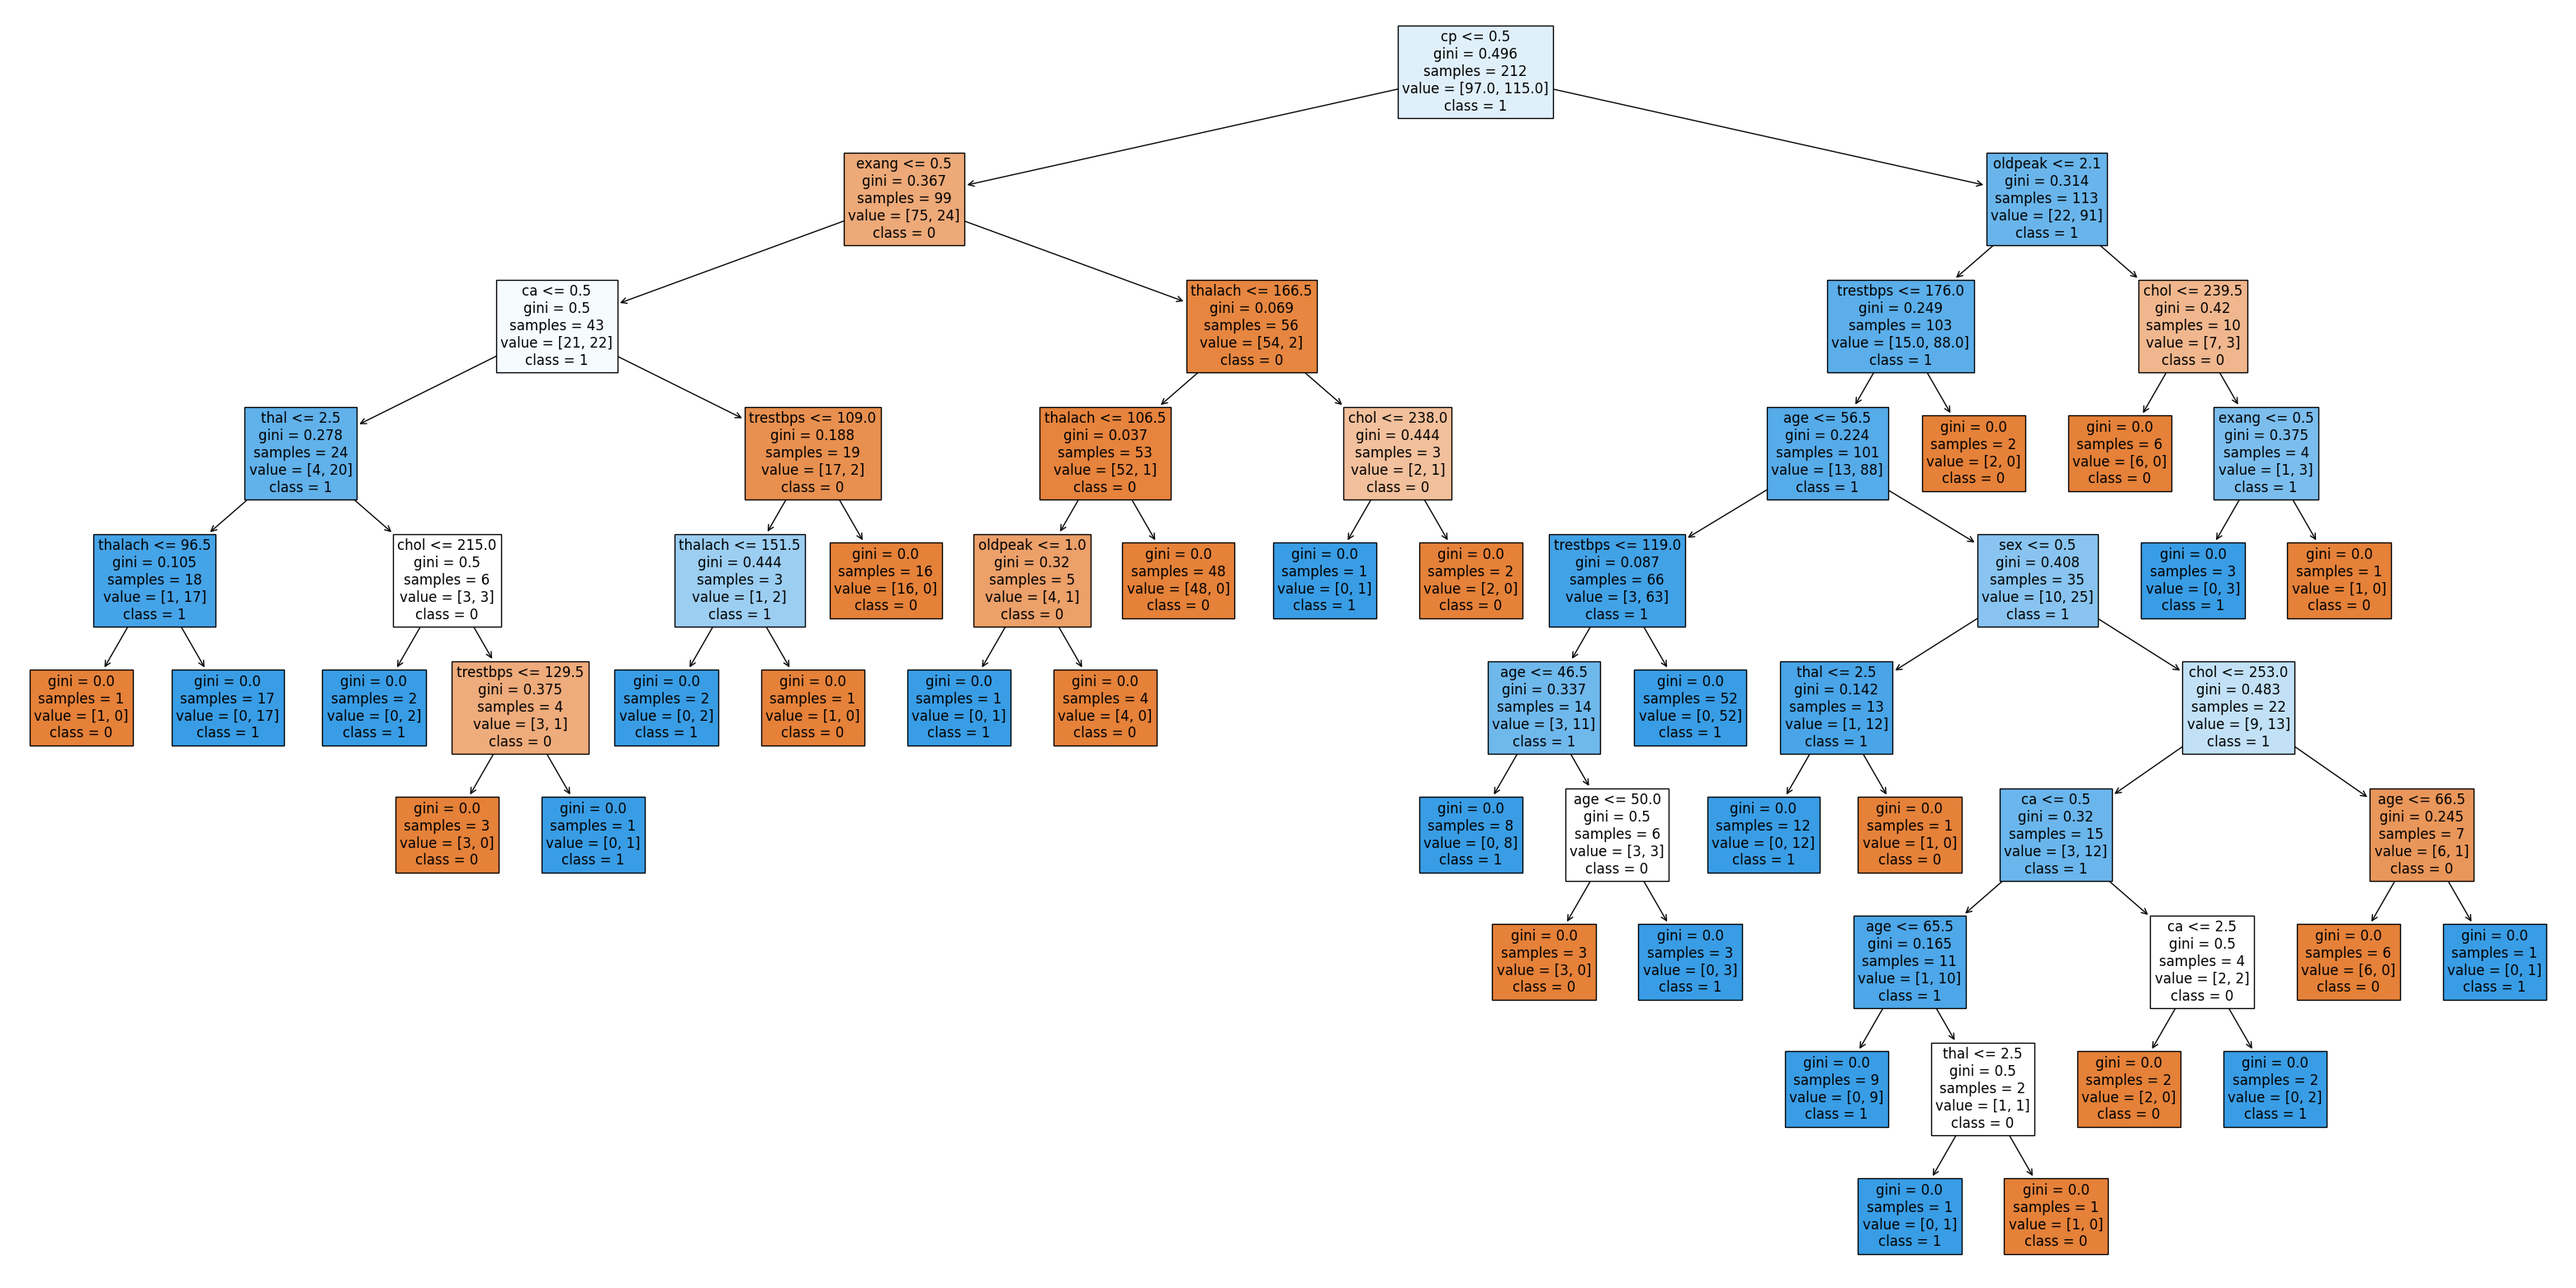

In [38]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(heart_model, 
                   feature_names=heart_data.columns,  
                   class_names={0:'0', 1:'1'},
                   filled=True,
                  fontsize=12)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
pred=heart_model.predict(test_X)
print(classification_report(test_y, pred))


              precision    recall  f1-score   support

           0       0.64      0.71      0.67        41
           1       0.74      0.68      0.71        50

    accuracy                           0.69        91
   macro avg       0.69      0.69      0.69        91
weighted avg       0.70      0.69      0.69        91



In [12]:
import numpy as np
from sklearn.metrics import accuracy_score ,precision_score, average_precision_score , f1_score , recall_score

acc = accuracy_score(test_y, pred)
print(acc)

precision_macro = precision_score(test_y, pred, average='macro')
precision_micro = precision_score(test_y, pred, average='micro')
precision_weighted = precision_score(test_y, pred, average='weighted')
precision_multi_samples = precision_score(test_y, pred, average=None)
precision_average = average_precision_score(test_y, pred)

f1_macro = f1_score(test_y, pred, average='macro')
f1_micro = f1_score(test_y, pred, average='micro')
f1_weighted = f1_score(test_y, pred, average='weighted')
f1_multi_samples = f1_score(test_y, pred, average=None)
f1_average = f1_score(test_y,pred, average=None)

recall_marco = recall_score(test_y, pred, average='macro')
recall_micro = recall_score(test_y, pred, average='micro')
recall_weighted =recall_score(test_y, pred, average='weighted')
recall_multi_samples= recall_score(test_y, pred, average=None)
recall_average = recall_score(test_y, pred, average=None)


0.6923076923076923


In [13]:
print("\t\tprecision\t\tf1\t\t\trecall")
print("macro\t\t{}\t{}\t{}".format(precision_macro,f1_macro,recall_marco))
print("micro\t\t{}\t{}\t{}".format(precision_micro,f1_micro,recall_micro))
print("weighted\t{}\t{}\t{}".format(precision_weighted,f1_weighted,recall_weighted))
print("multi_samples\t{}\t{}\t{}".format(precision_multi_samples,f1_multi_samples,f1_multi_samples))
print("average\t\t{}\t{}\t{}".format(precision_average,f1_average,recall_average))


		precision		f1			recall
macro		0.6917874396135266	0.6913759689922481	0.6936585365853658
micro		0.6923076923076923	0.6923076923076923	0.6923076923076923
weighted	0.6964697138610182	0.6930530709600476	0.6923076923076923
multi_samples	[0.64444444 0.73913043]	[0.6744186  0.70833333]	[0.6744186  0.70833333]
average		0.6784328714763497	[0.6744186  0.70833333]	[0.70731707 0.68      ]


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt

# Reading our data file
heart_data = pd.read_csv("heart.csv")

# Our prediction target is 'target'
y = heart_data.target

# Our features are all columns but the target
heart_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                  'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = heart_data[heart_features]

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.30)

# Calculate the cost-complexity pruning path
path = DecisionTreeClassifier().cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# For each alpha, train and evaluate the model
clfs = []
train_acc = []
test_acc = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred, y_train))
    test_acc.append(accuracy_score(y_test_pred, y_test))

# Plotting accuracy vs alpha
plt.scatter(ccp_alphas, train_acc)
plt.scatter(ccp_alphas, test_acc)
plt.plot(ccp_alphas, train_acc, label='train_accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_acc, label='test_accuracy', drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

# Choose the model with the optimal alpha
best_alpha = ccp_alphas[test_acc.index(max(test_acc))]
clf_best = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
clf_best.fit(x_train, y_train)

# Evaluate the best model on train and test data
y_train_pred = clf_best.predict(x_train)
y_test_pred = clf_best.predict(x_test)

print(f'Train score: {accuracy_score(y_train_pred, y_train)}')
print(f'Test score: {accuracy_score(y_test_pred, y_test)}')

# Plot confusion matrices
plot_confusion_matrix(clf_best, x_train, y_train, display_labels=["No Disease", "Disease"], cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion Matrix (Train)')
plt.show()

plot_confusion_matrix(clf_best, x_test, y_test, display_labels=["No Disease", "Disease"], cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion Matrix (Test)')
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Randa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\__init__.py)

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Reading our data file
heart_data = pd.read_csv("heart.csv")

# Our prediction target is 'target'
y = heart_data.target

# Our features are all columns but the target
heart_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                  'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = heart_data[heart_features]

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.30)

# Calculate the cost-complexity pruning path
path = DecisionTreeClassifier().cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# For each alpha, train and evaluate the model
clfs = []
train_acc = []
test_acc = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred, y_train))
    test_acc.append(accuracy_score(y_test_pred, y_test))

# Plotting accuracy vs alpha
plt.scatter(ccp_alphas, train_acc)
plt.scatter(ccp_alphas, test_acc)
plt.plot(ccp_alphas, train_acc, label='train_accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_acc, label='test_accuracy', drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

# Choose the model with the optimal alpha
best_alpha = ccp_alphas[test_acc.index(max(test_acc))]
clf_best = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
clf_best.fit(x_train, y_train)

# Evaluate the best model on train and test data
y_train_pred = clf_best.predict(x_train)
y_test_pred = clf_best.predict(x_test)

print(f'Train score: {accuracy_score(y_train_pred, y_train)}')
print(f'Test score: {accuracy_score(y_test_pred, y_test)}')

# Plot confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix (Train)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [14]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 220.2 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/294.9 kB 220.2 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 164.3 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 218.8 kB/s eta 0:00:02
   ------------ -------------------------- 92.2/294.9 kB 275.8 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 275.8 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 275.8 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 275.8 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 275.8 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/294.9 kB 471.0 k

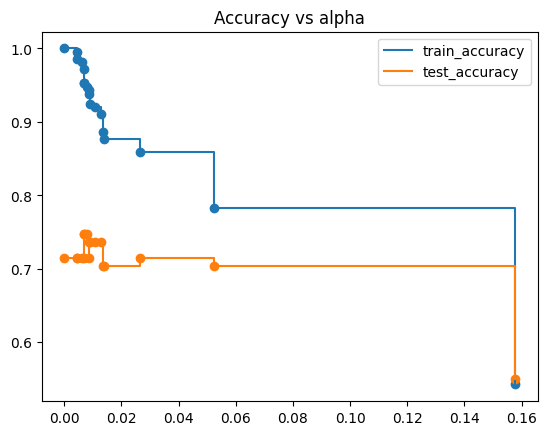

Train score: 0.9528301886792453
Test score: 0.7472527472527473


<Figure size 1000x400 with 0 Axes>

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


# Calculate the cost-complexity pruning path
path = DecisionTreeClassifier().cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# For each alpha, train and evaluate the model
clfs = []
train_acc = []
test_acc = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred, y_train))
    test_acc.append(accuracy_score(y_test_pred, y_test))

# Plotting accuracy vs alpha
plt.scatter(ccp_alphas, train_acc)
plt.scatter(ccp_alphas, test_acc)
plt.plot(ccp_alphas, train_acc, label='train_accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_acc, label='test_accuracy', drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

# Choose the model with the optimal alpha
best_alpha = ccp_alphas[test_acc.index(max(test_acc))]
clf_best = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
clf_best.fit(x_train, y_train)

# Evaluate the best model on train and test data
y_train_pred = clf_best.predict(x_train)
y_test_pred = clf_best.predict(x_test)

print(f'Train score: {accuracy_score(y_train_pred, y_train)}')
print(f'Test score: {accuracy_score(y_test_pred, y_test)}')

# Plot confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 4))

plt.tight_layout()
plt.show()

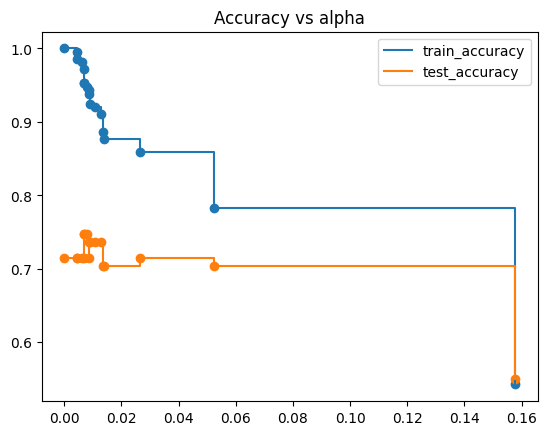

Train score: 0.9528301886792453
Test score: 0.7472527472527473


<Figure size 1000x400 with 0 Axes>

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate the cost-complexity pruning path
path = DecisionTreeClassifier().cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# For each alpha, train and evaluate the model
clfs = []
train_acc = []
test_acc = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred, y_train))
    test_acc.append(accuracy_score(y_test_pred, y_test))

# Plotting accuracy vs alpha
plt.scatter(ccp_alphas, train_acc)
plt.scatter(ccp_alphas, test_acc)
plt.plot(ccp_alphas, train_acc, label='train_accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_acc, label='test_accuracy', drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

# Choose the model with the optimal alpha
best_alpha = ccp_alphas[test_acc.index(max(test_acc))]
clf_best = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
clf_best.fit(x_train, y_train)

# Evaluate the best model on train and test data
y_train_pred = clf_best.predict(x_train)
y_test_pred = clf_best.predict(x_test)

print(f'Train score: {accuracy_score(y_train_pred, y_train)}')
print(f'Test score: {accuracy_score(y_test_pred, y_test)}')

plt.figure(figsize=(10, 4))

plt.tight_layout()
plt.show()